In [13]:
import numpy as np
from itertools import chain
import matplotlib.pyplot as plt

functions = [
    lambda x: x - np.sin(4*x) - 0.25,
    lambda x: x**3 - np.exp(x),
    lambda x: np.log10(x+2) + 7/(2*x-6),
]

derivatives = [
    lambda x: 1 - 4*np.cos(4*x),
    lambda x: 3*x**2 - np.exp(x),
    lambda x: 1/(x+2) - 7/(2*x-6)**2
]

second_derivatives = [
    lambda x: 16*np.sin(4*x),
    lambda x: 6*x - np.exp(x),
    lambda x: 2/(x+2)**2 + 42/(2*x-6)**3
]

def get_values(x, func):
    y = []
    for x_ in x:
        y.append(func(x_))
    return y

def get_equal_range(a, b, n):
    range_ = []
    adder = (b-a)/(n-1)
    for i in range(n):
        range_.append(a+adder*i)
    return range_

def get_optimal_range(a, b, n):
    range_ = []
    for i in range(n):
        range_.append(((b-a)*np.cos((2*i+1)*np.pi/(2*n))+(b+a))/2)
    return range_[::-1]

class HermitePolynomial:
    def __init__(self, x, y, dy):
        self.x = x
        self.y = y
        self.dy = dy
        self.p = len(x)

    def calculate(self, x):
        res = 0
        for k in range(self.p):
            y_ = self.y[k]
            x_ = self.x[k]
            dy_ = self.dy[k]

            l = 1
            for j in chain(range(0,k), range(k+1,len(self.x))):
                l *= ((x - self.x[j])/(x_ - self.x[j]))**2

            s = 0
            for i in chain(range(0,k), range(k+1,len(self.x))):
                s += (x - x_)/(x_ - self.x[i])

            res += ((x - x_)*dy_ + (1 - 2*s)*y_)*l
        return res

    def calculate_range(self, x):
        y = []
        for x_ in x:
            y.append(self.calculate(x_))
        return y

class HermitePolynomial2:
    def __init__(self, x, y, dy, d2y):
        self.x = x
        self.y = y
        self.dy = dy
        self.d2y = d2y
        self.p = len(x)

    def calculate(self, x):
        res = 0
        for k in range(self.p):
            y_ = self.y[k]
            x_ = self.x[k]
            dy_ = self.dy[k]
            d2y_ = self.d2y[k]

            l = 1
            for j in chain(range(0,k), range(k+1,len(self.x))):
                l *= ((x - self.x[j])/(x_ - self.x[j]))**2

            s = 0
            for i in chain(range(0,k), range(k+1,len(self.x))):
                s += (x - x_)/(x_ - self.x[i])

            res += ((x - x_)**2*d2y_ + (x - x_)*dy_ + (1 - 2*s)*y_)*l
        return res

    def calculate_range(self, x):
        y = []
        for x_ in x:
            y.append(self.calculate(x_))
        return y

class LagrangePolynomial:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def calculate(self, x):
        res = 0
        for i in range(len(self.y)):
            y_ = self.y[i]
            x_ = self.x[i]
            l = 1
            for j in chain(range(0,i), range(i+1,len(self.x))):
                l = l*(x - self.x[j])/(x_ - self.x[j])
            res += y_*l
        return res
    def calculate_range(self, x):
        y = []
        for x_ in x:
            y.append(self.calculate(x_))
        return y

def test(func, func_der, a, b, start_n, end_n, plot_n):
    for n in range(start_n, end_n+1):
        fig, axs = plt.subplots(1, 2, figsize=(6, 3))
        plot_range = get_equal_range(a, b, plot_n)
        plot_values = get_values(plot_range, func)
        axs[0].plot(plot_range, plot_values, linewidth=2.0, color='g')
        axs[1].plot(plot_range, plot_values, linewidth=2.0, color='g')

        eq_range = get_equal_range(a, b, n)
        eq_values = get_values(eq_range, func)
        eq_der_values = get_values(eq_range, func_der)
        eq_pol = HermitePolynomial(eq_range, eq_values, eq_der_values)
        eq_pol_values = eq_pol.calculate_range(plot_range)
        axs[0].plot(plot_range, eq_pol_values, linewidth=2.0, color='r')
        axs[0].set_title(f'eq, pnt: {n}, err: {np.around(np.linalg.norm(np.matrix(plot_values) - np.matrix(eq_pol_values)/len(plot_values)), 5)}')
        axs[0].grid(True)

        opt_range = get_optimal_range(a, b, n)
        opt_values = get_values(opt_range, func)
        opt_der_values = get_values(opt_range, func_der)
        opt_pol = HermitePolynomial(opt_range, opt_values, opt_der_values)
        opt_pol_values = opt_pol.calculate_range(plot_range)
        axs[1].plot(plot_range, opt_pol_values, linewidth=2.0, color='r')
        axs[1].set_title(f'opt, pnt: {n}, err: {np.around(np.linalg.norm(np.matrix(plot_values) - np.matrix(opt_pol_values)/len(plot_values)), 5)}')
        axs[1].grid(True)

def test2(func, func_der, func_d2er, a, b, start_n, end_n, plot_n):
    for n in range(start_n, end_n+1):
        fig, axs = plt.subplots(1, 3, figsize=(27, 9))
        plot_range = get_equal_range(a, b, plot_n)
        plot_values = get_values(plot_range, func)
        axs[0].plot(plot_range, plot_values, linewidth=2.0, color='g')
        axs[1].plot(plot_range, plot_values, linewidth=2.0, color='g')

        eq_range = get_equal_range(a, b, n)
        eq_values = get_values(eq_range, func)
        eq_der_values = get_values(eq_range, func_der)
        eq_d2er_values = get_values(eq_range, func_d2er)
        eq_pol = HermitePolynomial2(eq_range, eq_values, eq_der_values, eq_d2er_values)
        eq_pol_values = eq_pol.calculate_range(plot_range)
        axs[0].plot(plot_range, eq_pol_values, linewidth=2.0, color='r')
        axs[0].set_title(f'eq, pnt: {n}, err: {np.around(np.linalg.norm(np.matrix(plot_values) - np.matrix(eq_pol_values)/len(plot_values)), 5)}')
        axs[0].grid(True)

        opt_range = get_optimal_range(a, b, n)
        opt_values = get_values(opt_range, func)
        opt_der_values = get_values(opt_range, func_der)
        eq_d2er_values = get_values(opt_range, func_d2er)
        opt_pol = HermitePolynomial2(opt_range, opt_values, opt_der_values, eq_d2er_values)
        opt_pol_values = opt_pol.calculate_range(plot_range)
        h = (b - a) / (plot_n - 1)
        num_2der = (np.array(opt_pol_values[2:]) - 2 * np.array(opt_pol_values[1:-1]) + np.array(opt_pol_values[0:-2])) / h**2
        num_1der = (np.array(opt_pol_values[1:]) - np.array(opt_pol_values[:-1])) / h
        # axs[2].plot(plot_range[1:-1], num_2der, linewidth=2.0, color='r')
        axs[2].plot(plot_range[1:], num_1der, linewidth=2.0, color='r')
        axs[2].plot(plot_range, get_values(plot_range, func_der), linewidth=2.0, color='g')

        # axs[2].plot(plot_range, get_values(plot_range, func_d2er), linewidth=2.0, color='g')
        axs[1].plot(plot_range, opt_pol_values, linewidth=2.0, color='r')
        axs[1].set_title(f'opt, pnt: {n}, err: {np.around(np.linalg.norm(np.matrix(plot_values) - np.matrix(opt_pol_values)/len(plot_values)), 5)}')
        axs[1].grid(True)

def test3(func, func_der, a, b, start_n, end_n, plot_n):
    for n in range(start_n, end_n+1):
        fig, axs = plt.subplots(1, 4, figsize=(12, 3))
        plot_range = get_equal_range(a, b, plot_n)
        plot_values = get_values(plot_range, func)
        axs[0].plot(plot_range, plot_values, linewidth=2.0, color='g')
        axs[1].plot(plot_range, plot_values, linewidth=2.0, color='g')
        axs[2].plot(plot_range, plot_values, linewidth=2.0, color='g')
        axs[3].plot(plot_range, plot_values, linewidth=2.0, color='g')

        eq_range = get_equal_range(a, b, n)
        eq_values = get_values(eq_range, func)
        eq_der_values = get_values(eq_range, func_der)
        eq_pol = HermitePolynomial(eq_range, eq_values, eq_der_values)
        eq_pol_values = eq_pol.calculate_range(plot_range)
        axs[0].plot(plot_range, eq_pol_values, linewidth=2.0, color='r')
        axs[0].set_title(f'eq, pnt: {n}, err: {np.around(np.linalg.norm(np.matrix(plot_values) - np.matrix(eq_pol_values)/len(plot_values)), 5)}')
        axs[0].grid(True)

        opt_range = get_optimal_range(a, b, n)
        opt_values = get_values(opt_range, func)
        opt_der_values = get_values(opt_range, func_der)
        opt_pol = HermitePolynomial(opt_range, opt_values, opt_der_values)
        opt_pol_values = opt_pol.calculate_range(plot_range)
        axs[1].plot(plot_range, opt_pol_values, linewidth=2.0, color='r')
        axs[1].set_title(f'opt, pnt: {n}, err: {np.around(np.linalg.norm(np.matrix(plot_values) - np.matrix(opt_pol_values)/len(plot_values)), 5)}')
        axs[1].grid(True)

        eq_range = get_equal_range(a, b, n)
        eq_values = get_values(eq_range, func)
        eq_pol = LagrangePolynomial(eq_range, eq_values)
        eq_pol_values = eq_pol.calculate_range(plot_range)
        axs[2].plot(plot_range, eq_pol_values, linewidth=2.0, color='r')
        axs[2].set_title(f'eq, pnt: {n}, err: {np.around(np.linalg.norm(np.matrix(plot_values) - np.matrix(eq_pol_values)/len(plot_values)), 5)}')
        axs[2].grid(True)

        opt_range = get_optimal_range(a, b, n)
        opt_values = get_values(opt_range, func)
        opt_pol = LagrangePolynomial(opt_range, opt_values)
        opt_pol_values = opt_pol.calculate_range(plot_range)
        axs[3].plot(plot_range, opt_pol_values, linewidth=2.0, color='r')
        axs[3].set_title(f'opt, pnt: {n}, err: {np.around(np.linalg.norm(np.matrix(plot_values) - np.matrix(opt_pol_values)/len(plot_values)), 5)}')
        axs[3].grid(True)

def test4(func, func_der, func_d2er, a, b, start_n, end_n, plot_n):
    for n in range(start_n, end_n+1):
        fig, axs = plt.subplots(1, 4, figsize=(12, 3))
        plot_range = get_equal_range(a, b, plot_n)
        plot_values = get_values(plot_range, func)
        axs[0].plot(plot_range, plot_values, linewidth=2.0, color='g')
        axs[1].plot(plot_range, plot_values, linewidth=2.0, color='g')
        axs[2].plot(plot_range, plot_values, linewidth=2.0, color='g')
        axs[3].plot(plot_range, plot_values, linewidth=2.0, color='g')

        eq_range = get_equal_range(a, b, n)
        eq_values = get_values(eq_range, func)
        eq_der_values = get_values(eq_range, func_der)
        eq_d2er_values = get_values(eq_range, func_d2er)
        eq_pol = HermitePolynomial2(eq_range, eq_values, eq_der_values, eq_d2er_values)
        eq_pol_values = eq_pol.calculate_range(plot_range)
        axs[0].plot(plot_range, eq_pol_values, linewidth=2.0, color='r')
        axs[0].set_title(f'eq, pnt: {n}, err: {np.around(np.linalg.norm(np.matrix(plot_values) - np.matrix(eq_pol_values)/len(plot_values)), 5)}')
        axs[0].grid(True)

        opt_range = get_optimal_range(a, b, n)
        opt_values = get_values(opt_range, func)
        opt_der_values = get_values(opt_range, func_der)
        opt_d2er_values = get_values(opt_range, func_d2er)
        opt_pol = HermitePolynomial2(opt_range, opt_values, opt_der_values, opt_d2er_values)
        opt_pol_values = opt_pol.calculate_range(plot_range)
        axs[1].plot(plot_range, opt_pol_values, linewidth=2.0, color='r')
        axs[1].set_title(f'opt, pnt: {n}, err: {np.around(np.linalg.norm(np.matrix(plot_values) - np.matrix(opt_pol_values)/len(plot_values)), 5)}')
        axs[1].grid(True)

        eq_range = get_equal_range(a, b, n)
        eq_values = get_values(eq_range, func)
        eq_pol = LagrangePolynomial(eq_range, eq_values)
        eq_pol_values = eq_pol.calculate_range(plot_range)
        axs[2].plot(plot_range, eq_pol_values, linewidth=2.0, color='r')
        axs[2].set_title(f'eq, pnt: {n}, err: {np.around(np.linalg.norm(np.matrix(plot_values) - np.matrix(eq_pol_values)/len(plot_values)), 5)}')
        axs[2].grid(True)

        opt_range = get_optimal_range(a, b, n)
        opt_values = get_values(opt_range, func)
        opt_pol = LagrangePolynomial(opt_range, opt_values)
        opt_pol_values = opt_pol.calculate_range(plot_range)
        axs[3].plot(plot_range, opt_pol_values, linewidth=2.0, color='r')
        axs[3].set_title(f'opt, pnt: {n}, err: {np.around(np.linalg.norm(np.matrix(plot_values) - np.matrix(opt_pol_values)/len(plot_values)), 5)}')
        axs[3].grid(True)


First test:


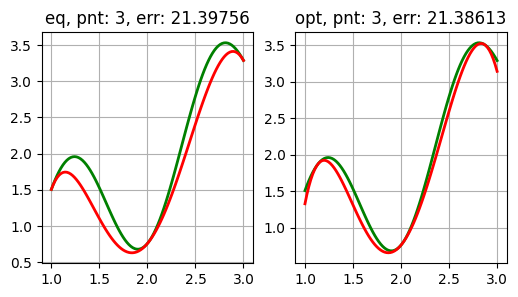

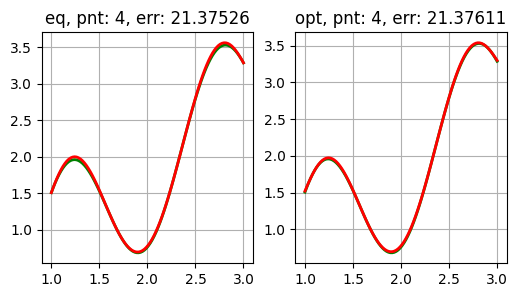

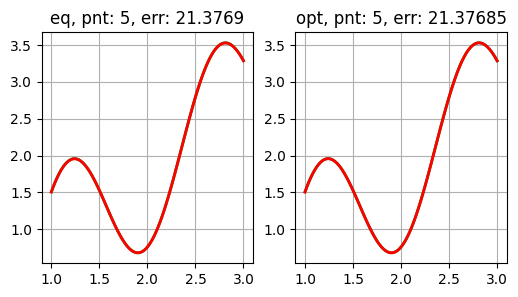

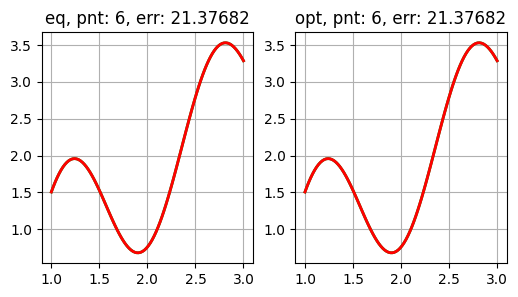

In [5]:
test_func_num = 0
test_a = 1
test_b = 3
test_start_n = 3
test_end_n = 6
test_plot_n = 100
print('First test:')
test(functions[test_func_num], derivatives[test_func_num], test_a, test_b, test_start_n, test_end_n, test_plot_n)


Second test:


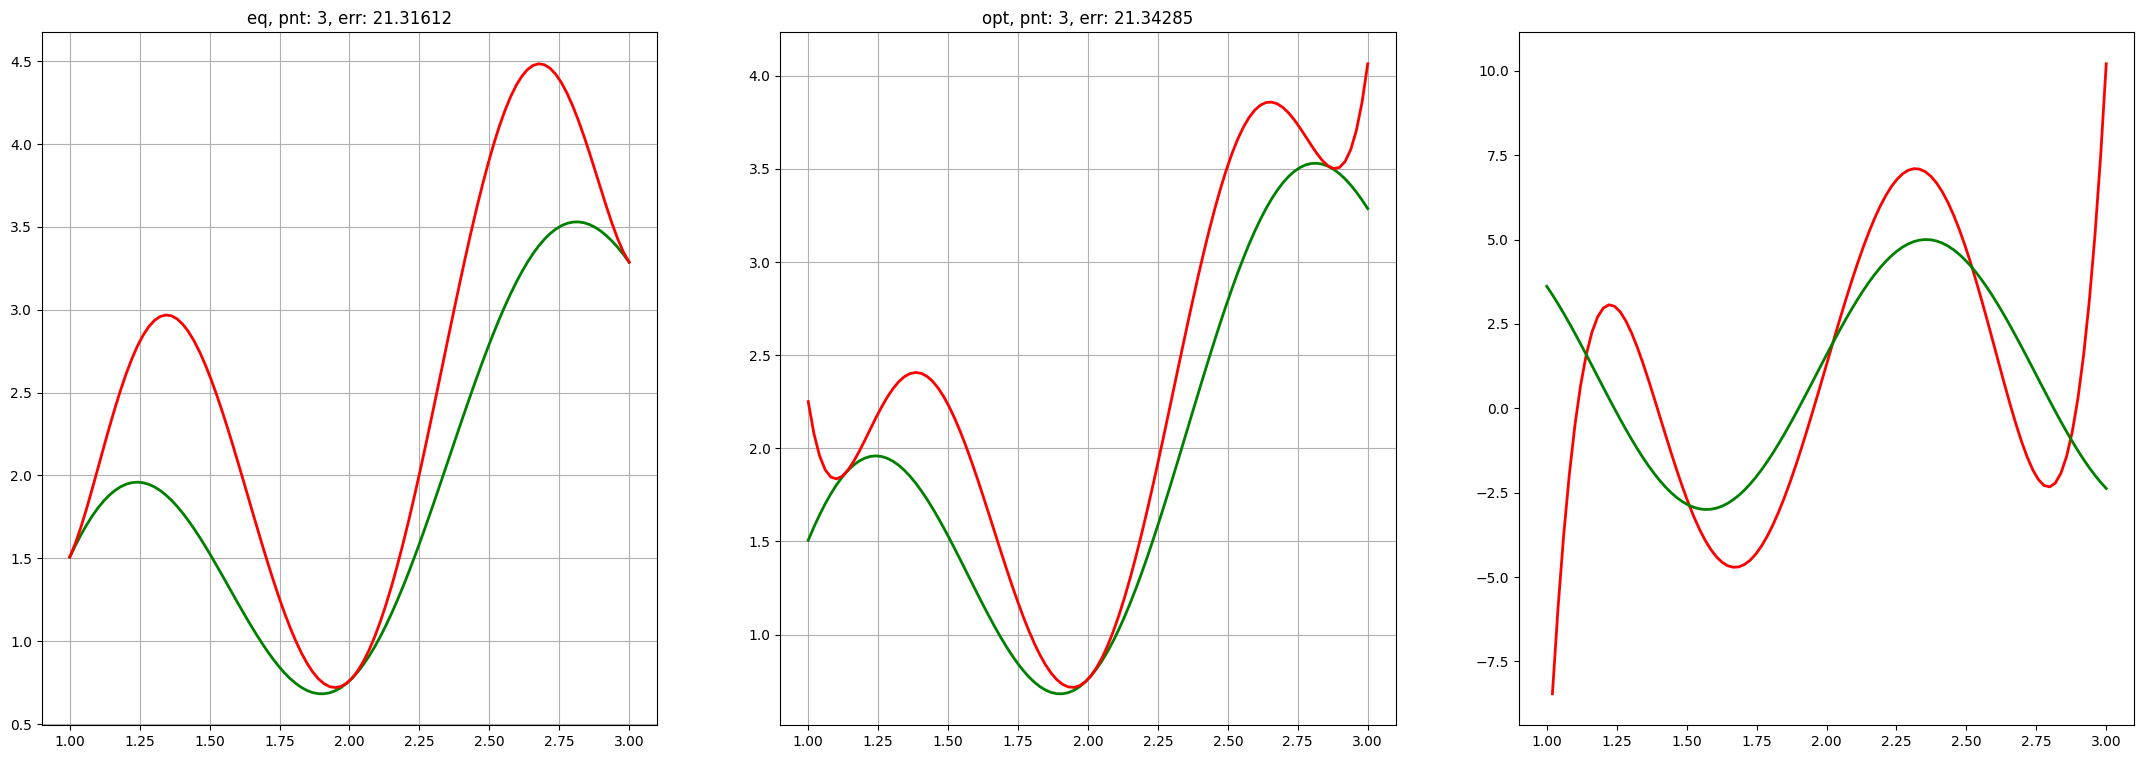

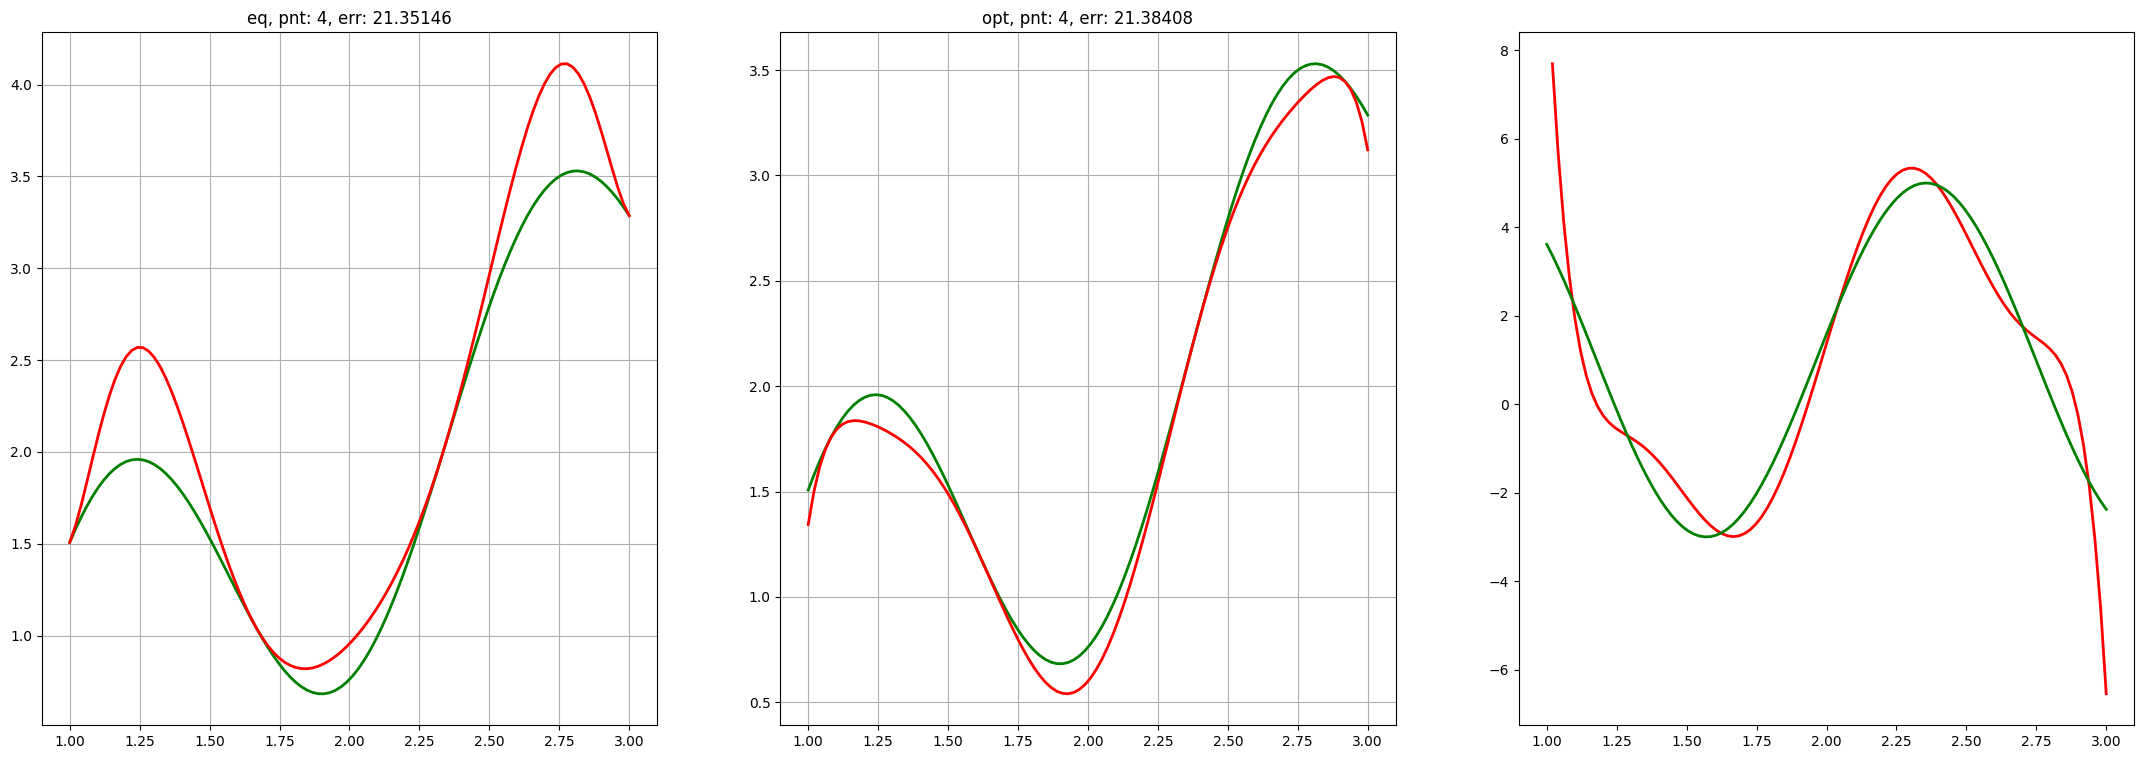

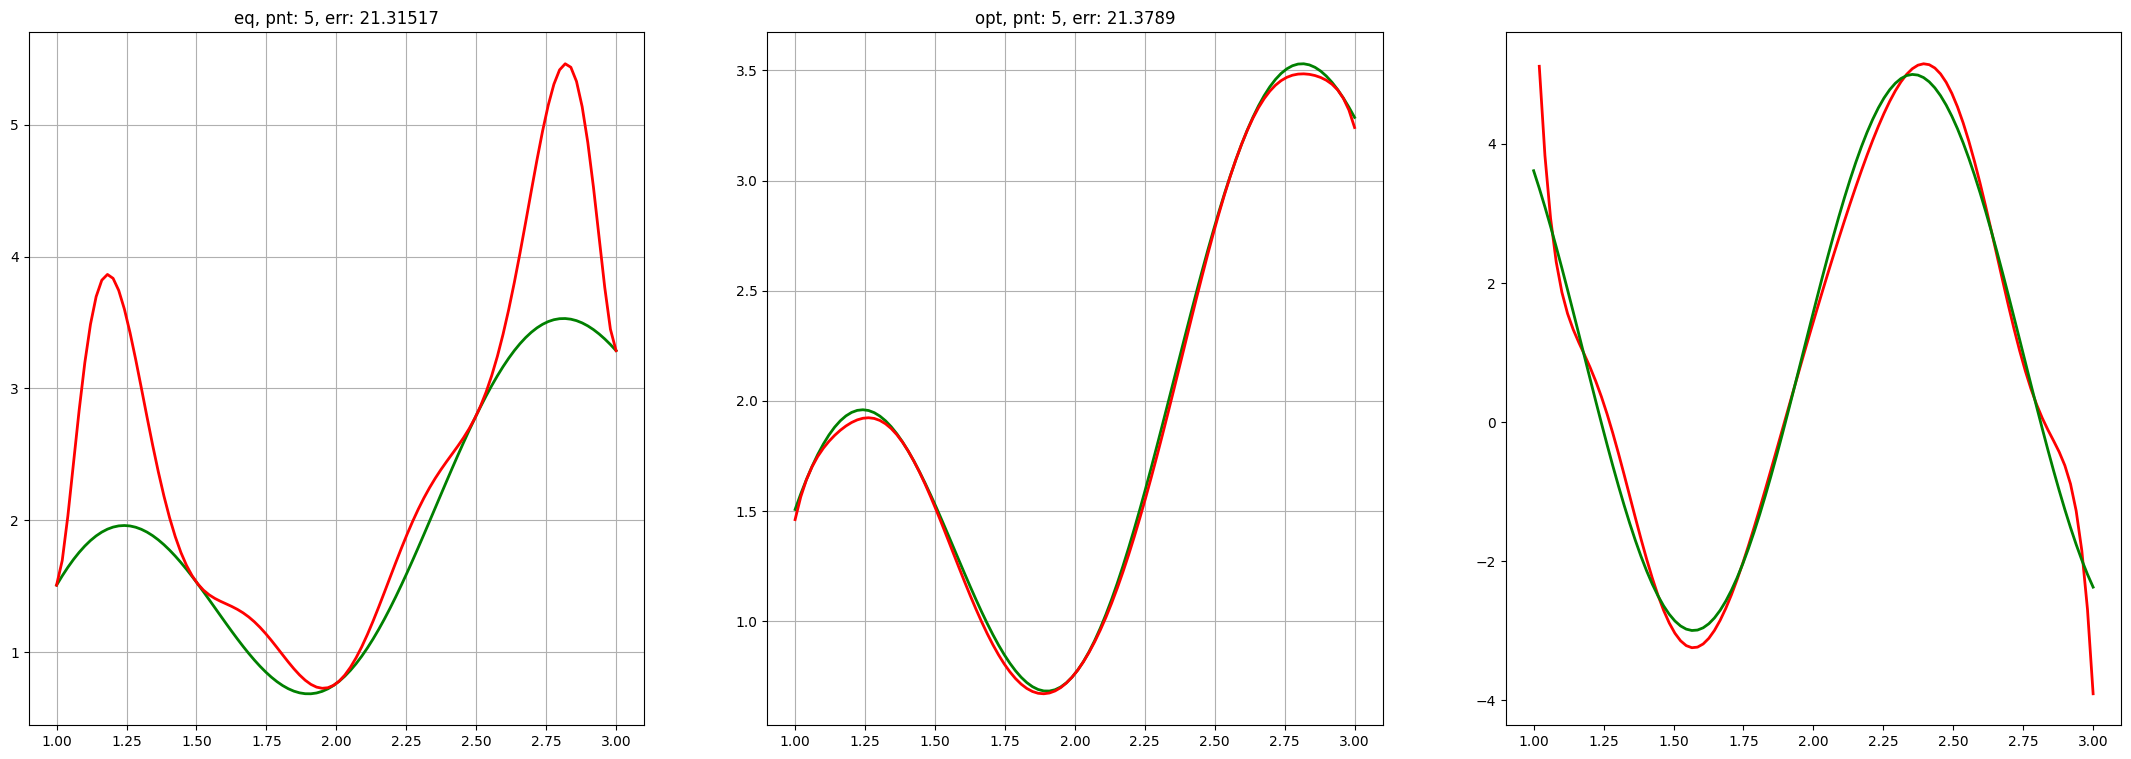

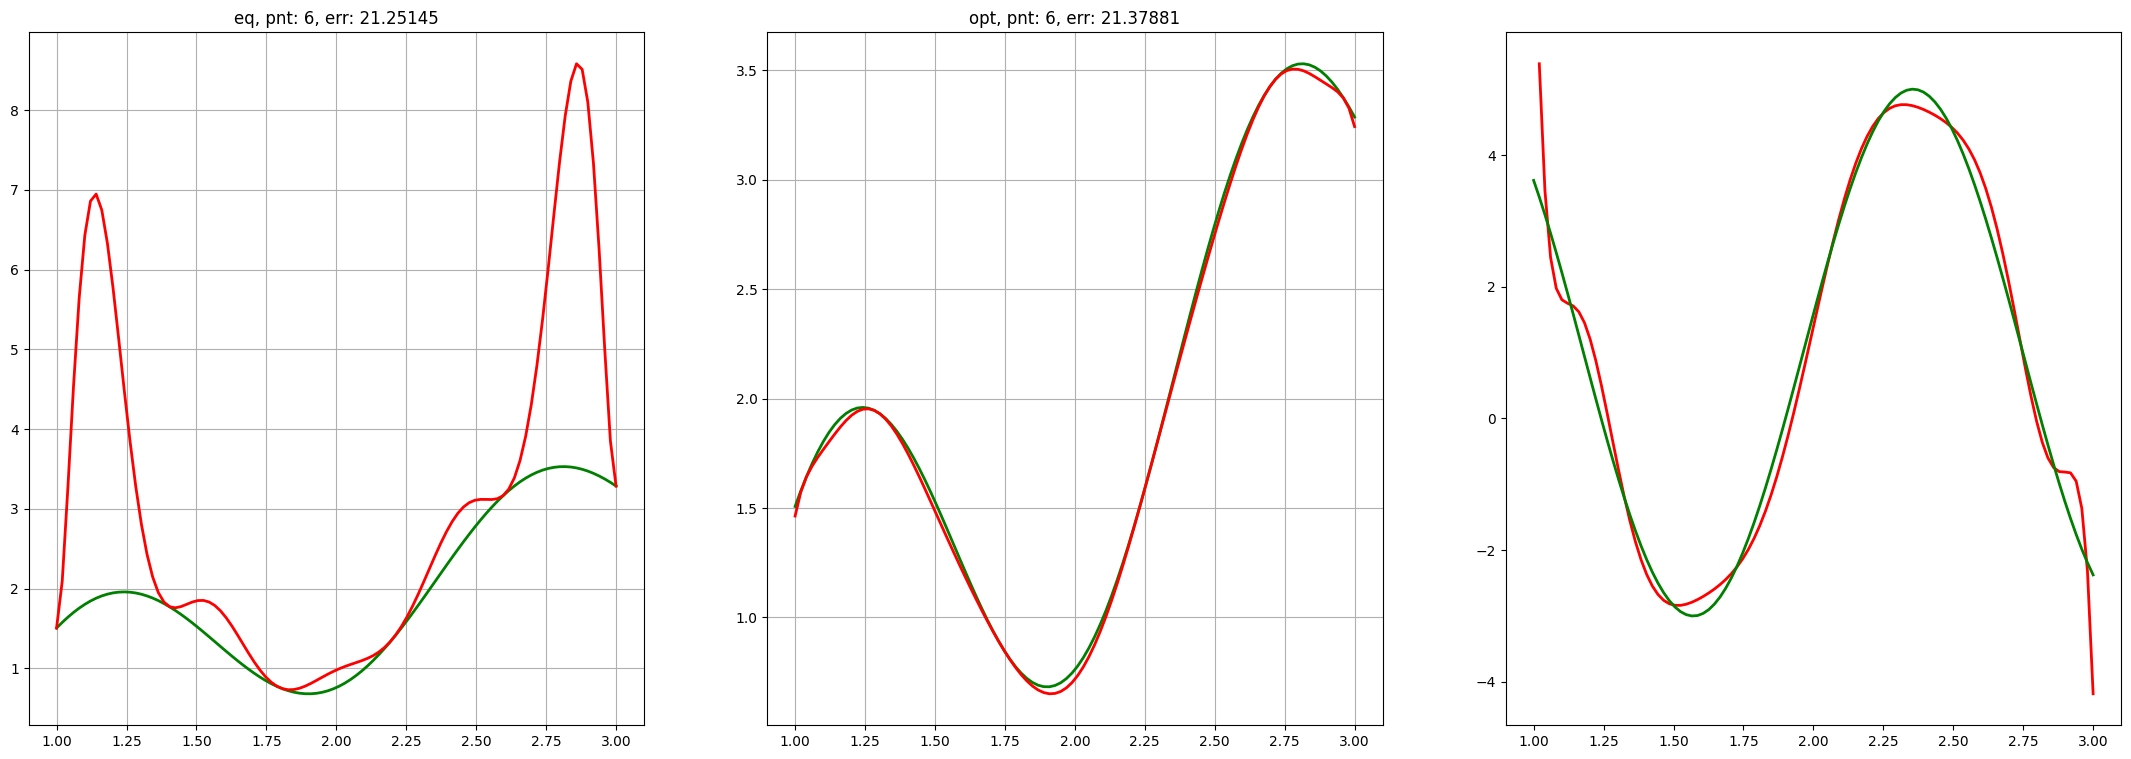

In [14]:
test_func_num = 0
test_a = 1
test_b = 3
test_start_n = 3
test_end_n = 6
test_plot_n = 100
print('Second test:')
test2(functions[test_func_num], derivatives[test_func_num], second_derivatives[test_func_num], test_a, test_b, test_start_n, test_end_n, test_plot_n)


Third test:


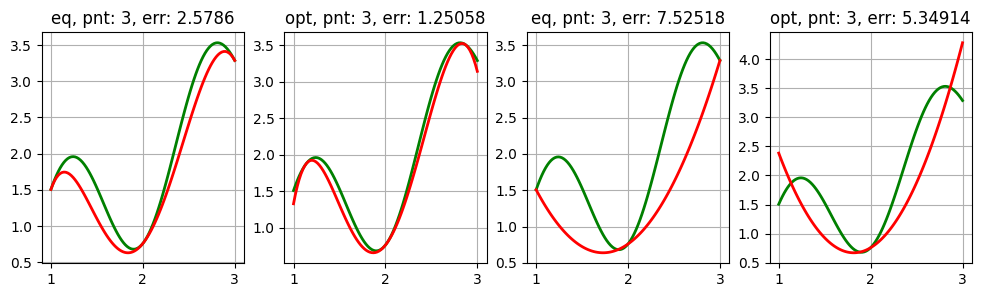

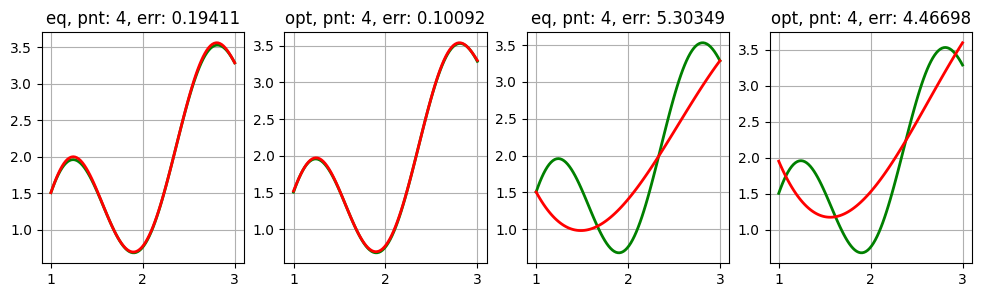

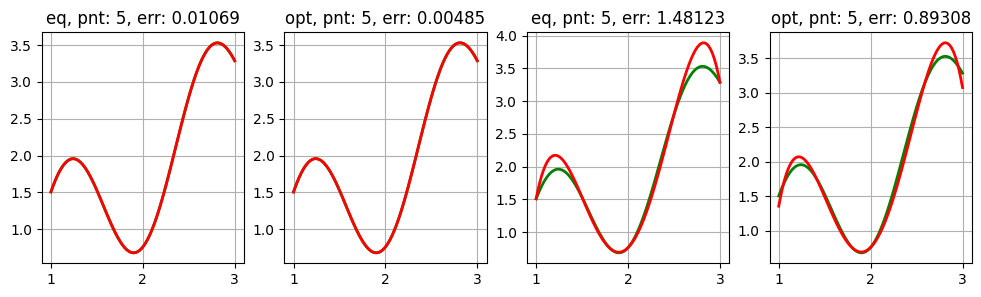

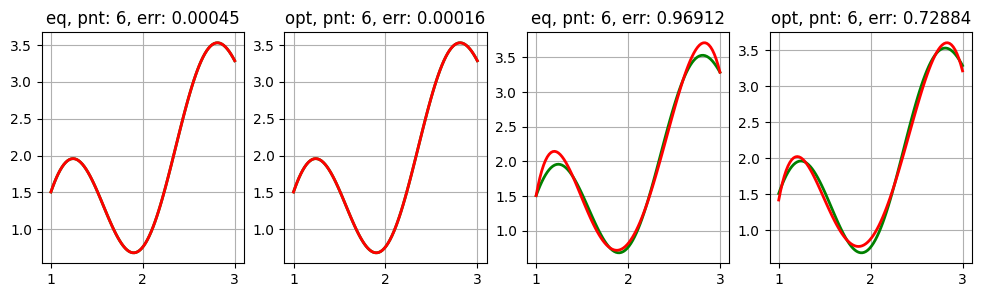

In [97]:
test_func_num = 0
test_a = 1
test_b = 3
test_start_n = 3
test_end_n = 6
test_plot_n = 100
print('Third test:')
test3(functions[test_func_num], derivatives[test_func_num], test_a, test_b, test_start_n, test_end_n, test_plot_n)


Fourth test:


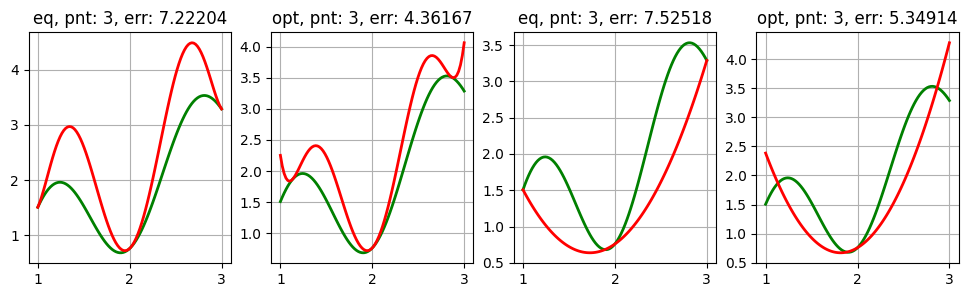

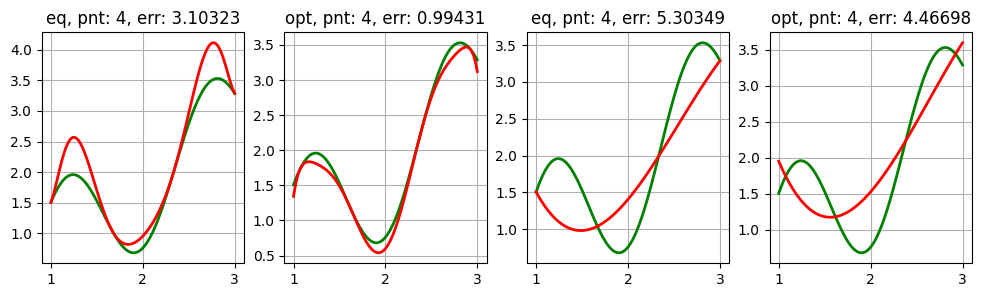

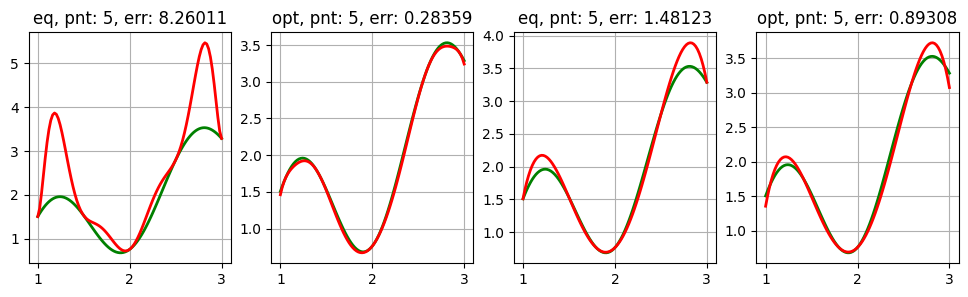

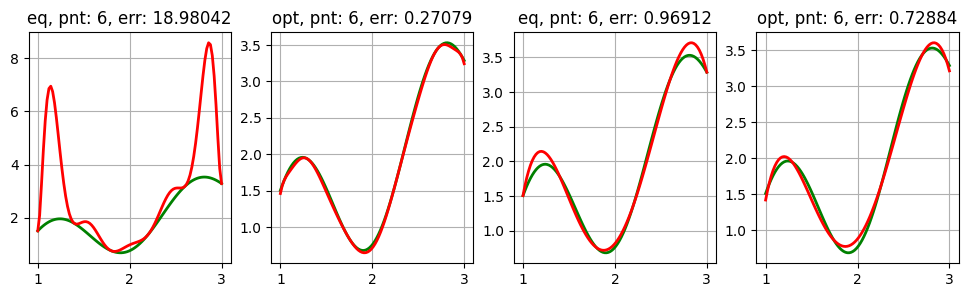

In [104]:
test_func_num = 0
test_a = 1
test_b = 3
test_start_n = 3
test_end_n = 6
test_plot_n = 100
print('Fourth test:')
test4(functions[test_func_num], derivatives[test_func_num], second_derivatives[test_func_num], test_a, test_b, test_start_n, test_end_n, test_plot_n)